In [1]:
#    import maf packages
get_ipython().magic('matplotlib inline')
import lsst.sims.maf.plots as plots
from mafContrib import TransientAsciiMetric

In [2]:
#    import maf packages
from __future__ import print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

METTENDO LA CELL SOPRA, PRESA DA PullLightCurves.ipynb, FUNZIONA ANCHE SENZA sympy

In [3]:
# Set the database and query
#runName = 'baseline_nexp2_v1.7_10yrs'
#runName = 'footprint_gp_smoothv1.5_10yrs'
#runName = 'combo_dust_v1.6_10yrs'
#runName = 'baseline_v1.5_10yrs'
#runName = 'baseline_nexp1_v1.6_10yrs'
#runName = 'ddf_heavy_v1.6_10yrs'
#runName = 'mw_heavy_v1.6_10yrs'
#runName = 'ddf_heavy_nexp2_v1.6_10yrs'
#runName = 'ddf_dither2.00_v1.7_10yrs'
runName = 'carina_v1.7_10yrs'

#This next command assumes you have downloaded baseline2018a.db into the tutorials directory in this repo.
#Change this path according to your datbase and where it is saved.
#opsdb = db.OpsimDatabase('/sims_maf/fbs_1.7/baseline/baseline_nexp2_v1.7_10yrs.db')
#opsdb = db.OpsimDatabase('/sims_maf/fbs_1.5/footprints/footprint_gp_smoothv1.5_10yrs.db')
#opsdb = db.OpsimDatabase('/sims_maf/fbs_1.6/potential_schedulers/combo_dust_v1.6_10yrs.db')
#opsdb = db.OpsimDatabase('/sims_maf/fbs_1.5/baseline/baseline_v1.5_10yrs.db')
#opsdb = db.OpsimDatabase('/sims_maf/fbs_1.6/potential_schedulers/baseline_nexp1_v1.6_10yrs.db')
#opsdb = db.OpsimDatabase('/sims_maf/fbs_1.6/potential_schedulers/ddf_heavy_v1.6_10yrs.db')
#opsdb = db.OpsimDatabase('/sims_maf/fbs_1.6/potential_schedulers/mw_heavy_v1.6_10yrs.db')
#opsdb = db.OpsimDatabase('/sims_maf/fbs_1.6/potential_schedulers/ddf_heavy_nexp2_v1.6_10yrs.db')
#opsdb = db.OpsimDatabase('/sims_maf/fbs_1.7/ddf_dither/ddf_dither2.00_v1.7_10yrs.db')
opsdb = db.OpsimDatabase('carina_v1.7_10yrs.db')

# Set the output directory
outDir = 'LightCurve-2'
resultsDb = db.ResultsDb(outDir)

In [4]:
asciiLC = 'source0603396438_whole_CoRoT_LC_NEW_sampled.dat'
transMetric = TransientAsciiMetric(asciiLC, surveyDuration=1,mjdCol='observationStartMJD', 
                                   detectSNR={'u': 5, 'g': 5, 'r': 5, 'i': 5, 'z': 5, 'y': 5},
                                   nPreT=0, preT=0, nFilters=0, filterT=None, nPerLC=0, peakOffset=0,
                                   dataout=True)

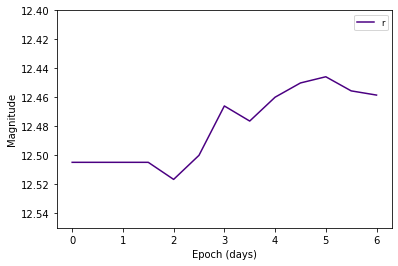

In [5]:
# Use the metric to generate a tightly sampled lightcurve, to illustrate what the lightcurve looks like.
#filterNames = ['u', 'g', 'r', 'i', 'z', 'y']
#filterNames = ['g', 'r', 'i']
filterNames = ['r']
colors = {'u': 'k', 'g': 'violet', 'r': 'indigo', 'i': 'blue', 'z': 'y', 'y': 'orange'}
times = np.arange(0, transMetric.transDuration, 0.5)
lc = {}
for f in filterNames:
    lc[f] = transMetric.make_lightCurve(times, np.array([f]*len(times)))

plt.figure()
for f in filterNames:
    plt.plot(times, lc[f], color=colors[f], label=f)
plt.ylim(12.55,12.4)
#plt.xlim(0.,8.5) #AGGIUNTO DA ME PER FARE PLOT SOLO 1 SETTIMANA
plt.xlabel('Epoch (days)')
plt.ylabel('Magnitude')
plt.legend(fontsize='smaller', numpoints=1)

7 GIORNI

In [6]:
# Slicer - we just want to look at what the full lightcurve output looks like, so choose a few representative points.
# With the UserPointsSlicer, you can set ra/dec for the places you want to evaluate.
# These ra/dec pairs are 1 DD field, 2 WFD fields, and Carina Nebula
#ra = np.array([ 34.39339593,  73.58279239,  97.45622484,  161.2592917])
#dec = np.array([ -5.09032894,   0.1873572 , -37.70921729, -59.6999444])
# These ra/dec pairs are 4 DD fields: MODIFICATO DA QUI https://www.lsst.org/scientists/survey-design/ddf
#ra = np.array([ 9.4500,  35.7083333,  53.1250000, 150.1000000])
#dec = np.array([ -44.0000 , -4.7500, -28.1000000, 2.1819444])
# These ra/dec pairs are 3 DD fields (CIRCA XMM = ESEMPIO, CHANDRA, ELAIS), 1 WFD (= ESEMPIO) field
#ra = np.array([ 34.39339593,  53.1250000, 9.4500, 97.45622484])
#dec = np.array([ -5.09032894,   -28.1000000 , -44.0000, -37.70921729])
ra = np.array([ 161.2592917]) # MODIFICATO DA ME PER CARINA DA: http://simbad.u-strasbg.fr/simbad/sim-id?Ident=Carina+Nebula
dec = np.array([ -59.6999444]) # MODIFICATO DA ME PER CARINA DA: http://simbad.u-strasbg.fr/simbad/sim-id?Ident=Carina+Nebula
# ESEMPIO SINGOLO CAMPO:
#ra = np.array([ 161.2592917])
#dec = np.array([ -59.6999444])
#ra = np.array([ 53.1250000])
#dec = np.array([ -28.1000000])
#ra = np.array([ 160.])
#dec = np.array([ -60.])
slicer = slicers.UserPointsSlicer(ra, dec)

# SQL constraint.
# select the year of the survey that you want to run 
year = 0
sqlconstraint = 'night between %f and %f '% ((365.25*year,365.25*(year+.1)))
lightcurve_metric = metricBundles.MetricBundle(transMetric, slicer, sqlconstraint, runName=runName)
#metric = metrics.CountMetric('night')
#lightcurve_metric = metricBundles.MetricBundle(metric, slicer, sqlconstraint, runName=runName)

MODIFICATA CELL SOPRA PER 36 GIORNI (NON 10 ANNI)

In [7]:
# run the metric
bgroup = metricBundles.MetricBundleGroup({0: lightcurve_metric}, opsdb, 
                                         outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database SummaryAllProps with constraint night between 0.000000 and 36.525000  for columns ['fieldRA', 'filter', 'fiveSigmaDepth', 'observationStartMJD', 'fieldDec']
Found 23385 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [8]:
for i, data in enumerate(lightcurve_metric.metricValues):
    for lcN in np.unique(data['lcNumber']):
        match = np.where(data['lcNumber'] == lcN)
        plt.figure()
        epoch = data['epoch'][match]
        mjd = data['expMJD'][match]
        mags = data['lcMag'][match]
        filters = data['filter'][match]
        for f in filterNames:
            filtermatch = np.where(filters == f)
            plt.plot(times - epoch[0] + mjd[0], lc[f], color=colors[f])
            plt.plot(mjd[filtermatch], mags[filtermatch], 'o', color=colors[f], label=f)
            print(mjd[filtermatch],mags[filtermatch])
            print(len(mjd[filtermatch]))
            #print(max(mjd))
        plt.ylim(plt.ylim()[::-1]) # NELL'ESEMPIO ERA CON QUESTO
        #plt.ylim(12.55,12.4) #AGGIUNTO DA ME PER FARE PLOT SOLO 1 SETTIMANA
        #plt.xlim(59865.,59871.) #AGGIUNTO DA ME PER FARE PLOT SOLO 1 SETTIMANA
        #plt.xlim(times[0] - epoch[0] + mjd[0] - 2, times[0] - epoch[0] + mjd[0] + 195)
        plt.legend(ncol = 2, loc = (.8,.8), numpoints=1, fontsize='smaller') 
        plt.xlabel('MJD')
        plt.ylabel('Mags')
        plt.title('Field %d at %f/%f, lightcurve %d' % (i, np.degrees(slicer.slicePoints['ra'][i]), 
                                                        np.degrees(slicer.slicePoints['dec'][i]), lcN))
        plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
metric = TransientAsciiMetric(asciiLC, surveyDuration=1,mjdCol='observationStartMJD',
                              detectSNR={'u': 5, 'g': 5, 'r': 5, 'i': 5, 'z': 5, 'y': 5},
                              nPreT=3, preT=5, nFilters=3, filterT=30, nPerLC=2, peakOffset=0,
                              dataout=False)
slicer = slicers.HealpixSlicer(nside=16)
year = 0
sqlconstraint = 'night between %d and %d' % (365.25 * year, 365.25 * (year + 9)) # PRIMA ERA +10 E NON +9

plotFuncs = [plots.HealpixSkyMap(), plots.HealpixHistogram()]
plotDict = {'colorMin': 0, 'colorMax': 1}

summaryMetrics = [metrics.MeanMetric(), metrics.RmsMetric()]

bundle = metricBundles.MetricBundle(metric, slicer, sqlconstraint, 
                                    runName=runName, summaryMetrics=summaryMetrics,
                                    plotDict=plotDict, plotFuncs=plotFuncs)

In [ ]:
bundlegroup = metricBundles.MetricBundleGroup({0: bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
bundlegroup.runAll()

In [ ]:
bundlegroup.plotAll(closefigs=False)

In [ ]:
print (bundle.summaryValues)